In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Gravity waves
The system of ordinary differential equations that describe the velocity field of a fluid in a basin of depth $h$ with surface waves propagating in it is:
$$ \begin{cases} v_x = -kC\text{sin}(kx-\omega t)\text{cosh}(k(z+h)) \\ v_z = kC\text{cos}(kx-\omega t)\text{sinh}(k(z+h)) \\ \end{cases}$$ 

REMEMBER: $v_i = \frac{Dx_i}{Dt}$.

Completed by the dispersion relation $$ \omega^2 = kg \text{tanh}(kh) \text{,}$$ 
where $g$ is the gravitational acceleration. We rescale the equations in terms of adimensional quantities with the following substitutions:

$$ \begin{cases} x = hx' \\ z = hz' \\ t = \sqrt{\frac{h}{g}}t' \\ v = \sqrt{gh} v' \\ C=\alpha h\sqrt{gh} \end{cases} $$ 

By doing so we obtain rescaled equations that only depend on the adimensional parameters $\phi = kh$ and $\alpha$, a rescaled amplitude which should be taken very small in order to fall in the approximation of small oscillations around the equilibrium position at $z'=0$. The rescaled equations read:
$$ \begin{cases} v'_x = -\alpha\phi \text{sin}(\phi(x'-v'_{ph}t'))\text{cosh}(\phi(z'+1)) \\ v'_z = \alpha\phi \text{cos}(\phi(x'-v'_{ph}t'))\text{sinh}(\phi(z'+1)) \\ \end{cases}$$  

$x' \in (-\infty, \infty) $, $z' [-1, \sim 0) $ and $v'_{ph} = \sqrt{\frac{\text{tanh}(\phi)}{\phi}}$.

## Preliminatory study

In [69]:
parameters = np.loadtxt("Initial_study/output.dat", usecols=1, max_rows=6)

In [70]:
alpha = parameters[2]
phi = parameters[3]
x_0 = parameters[4]
z_0 = parameters[5]
print("====================")
print("=====parameters=====")
print("alpha: ", alpha)
print("phi: ", phi)
print("x_0: ", x_0)
print("z_0: ", z_0)
print("====================")

=====parameters=====
alpha:  0.01
phi:  1.0
x_0:  0.0
z_0:  0.0


In [71]:
time, x, z = np.loadtxt("Initial_study/output.dat", usecols=(0,1,2), skiprows=7, unpack=True)

Text(0, 0.5, "z'(t') [AU]")

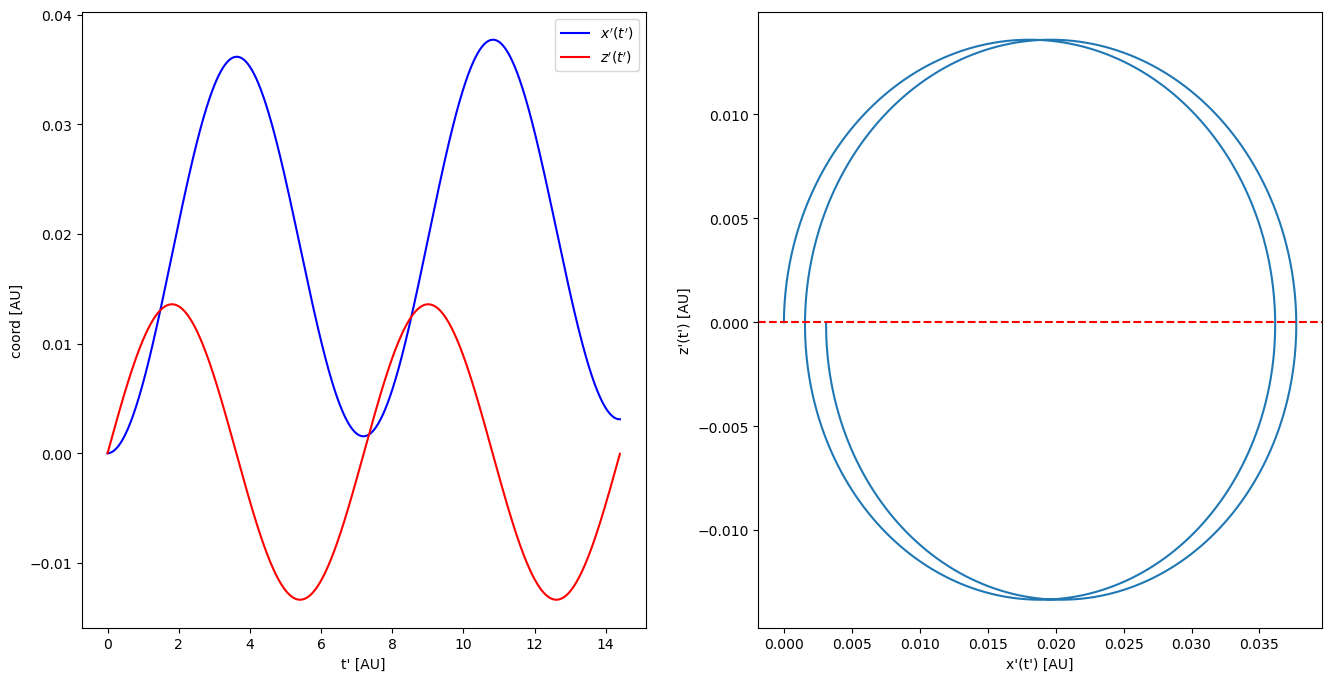

In [72]:
fig, axx = plt.subplots(1, 2, figsize=(16, 8))

ax1=axx[0]
ax1.plot(time, x, linestyle="-", color = "b", label=r"$x'(t')$")
ax1.plot(time, z, linestyle="-", color = "r", label=r"$z'(t')$")
ax1.set_xlabel(r"t' [AU]")
ax1.set_ylabel(r"coord [AU]")
ax1.legend(loc="best")

ax2=axx[1]
ax2.plot(x, z, linestyle="-")
ax2.axhline(y=0.0, linestyle="--", color = "r")
#ax2.set_ylim(-0.5, 0.5)
ax2.set_xlabel(r"x'(t') [AU]")
ax2.set_ylabel(r"z'(t') [AU]")

## Motion as a function of $\alpha$

Here we consider the trajectory of a particle of fluid starting in the origin as a function of the amplitude of the wave, $\alpha \in [0.01, 0.1]$. A single oscillatory period is shown, where a period is:
$$ T' = \frac{2\pi}{\sqrt{\phi\text{tanh}(\phi)}} $$

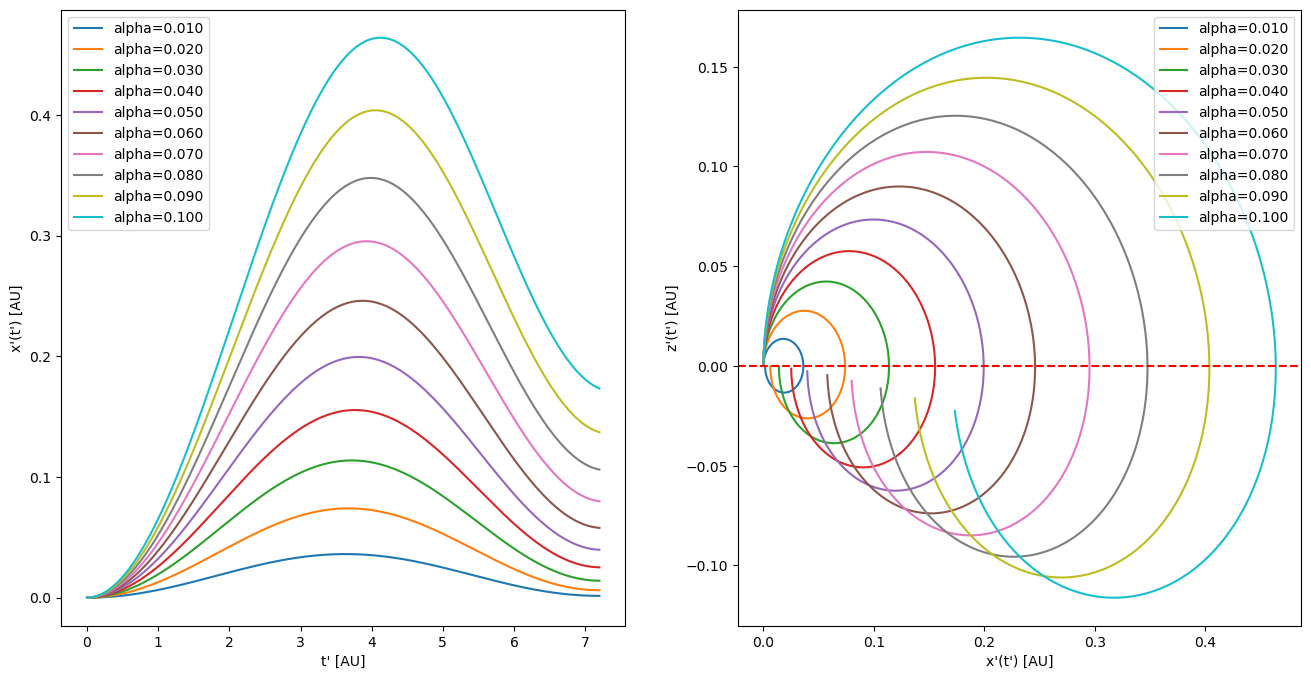

In [37]:
fig, axx = plt.subplots(1, 2, figsize=(16, 8))

alpha_range = np.linspace(0.01, 0.1, 10)

ax1=axx[0]

for alpha in alpha_range:
    filename = f"alpha/{format(alpha, '.3f')}=alpha.txt"
    time, x, z = np.loadtxt(filename, usecols=(0,1,2), skiprows=7, unpack=True)
    ax1.plot(time, x, linestyle="-", label=f"alpha={format(alpha, '.3f')}")
ax1.set_xlabel(r"t' [AU]")
ax1.set_ylabel(r"x'(t') [AU]")
ax1.legend(loc="best")

ax2=axx[1]

for alpha in alpha_range:
    filename = f"alpha/{format(alpha, '.3f')}=alpha.txt"
    time, x, z = np.loadtxt(filename, usecols=(0,1,2), skiprows=7, unpack=True)
    ax2.plot(x, z, linestyle="-", label=f"alpha={format(alpha, '.3f')}")
ax2.axhline(y=0.0, linestyle="--", color = "r")
ax2.set_xlabel(r"x'(t') [AU]")
ax2.set_ylabel(r"z'(t') [AU]")
ax2.legend(loc="best")

The more $\alpha$ is increased, the less the motion along $x$ is periodic. What does this mean?

## Motion as a function of $z_0$

Here we consider the trajectory of particles of fluid starting at different heights. $ z'(0) \in [-1.0, -0.1] $.

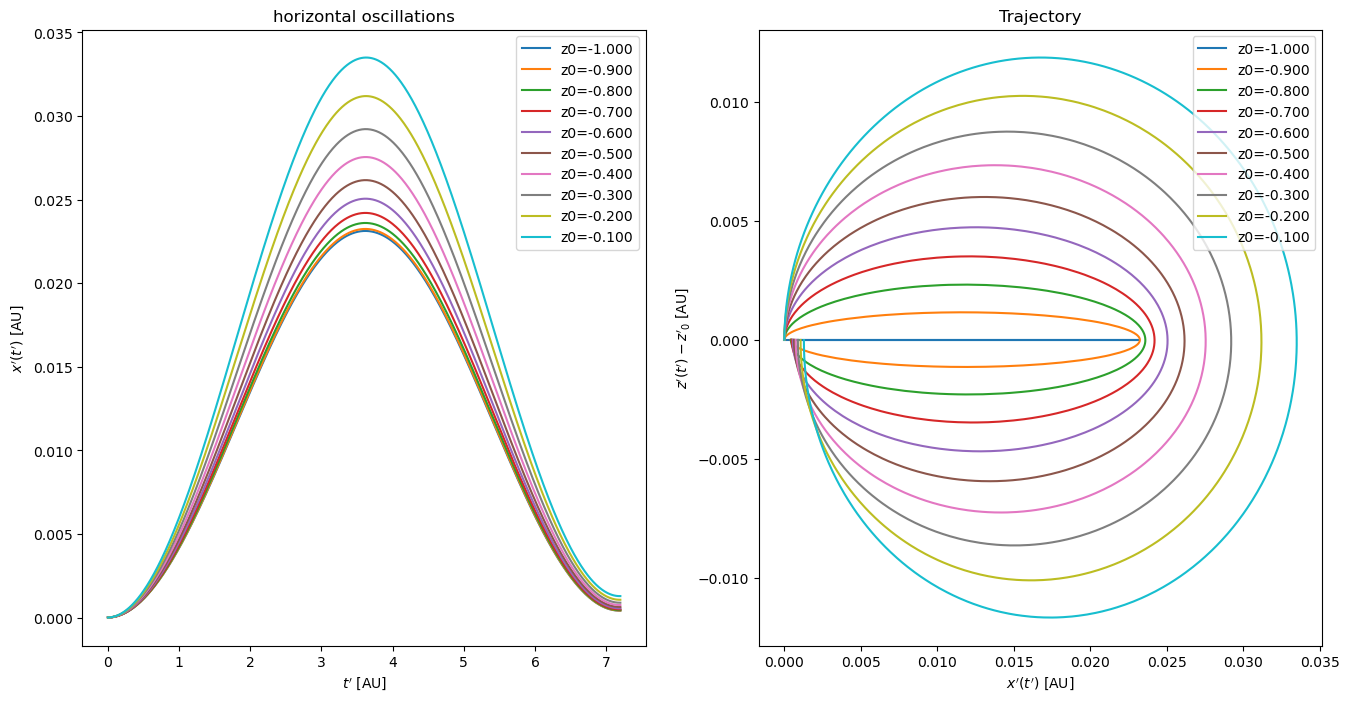

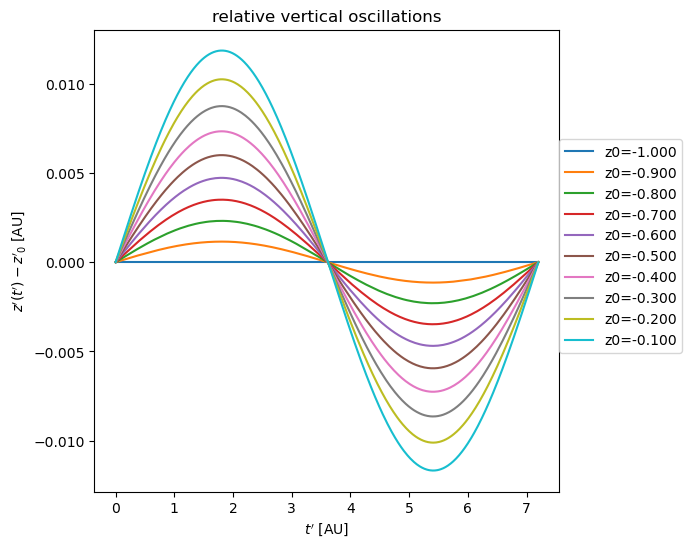

In [52]:
fig, axx = plt.subplots(1, 2, figsize=(16, 8))

z0_range = np.linspace(-1.0, -0.1, 10)

ax1=axx[0]

for z0 in z0_range:
    filename = f"z0/{format(z0, '.3f')}=z0.txt"
    time, x, z = np.loadtxt(filename, usecols=(0,1,2), skiprows=7, unpack=True)
    ax1.plot(time, x, linestyle="-", label=f"z0={format(z0, '.3f')}")
ax1.set_title("horizontal oscillations")
ax1.set_xlabel(r"$t'$ [AU]")
ax1.set_ylabel(r"$x'(t')$ [AU]")
ax1.legend(loc="best")

ax2=axx[1]

for z0 in z0_range:
    filename = f"z0/{format(z0, '.3f')}=z0.txt"
    time, x, z = np.loadtxt(filename, usecols=(0,1,2), skiprows=7, unpack=True)
    ax2.plot(x, z-z0, linestyle="-", label=f"z0={format(z0, '.3f')}")
#ax2.axhline(y=0.0, linestyle="--", color = "r")
ax2.set_title("Trajectory")
ax2.set_xlabel(r"$x'(t')$ [AU]")
ax2.set_ylabel(r"$z'(t')-z'_0$ [AU]")
#ax2.set_xlim(-0.01, 0.1)
ax2.legend(loc="best")


plt.subplots(1, 1, figsize=(6, 6))
for z0 in z0_range:
    filename = f"z0/{format(z0, '.3f')}=z0.txt"
    time, x, z = np.loadtxt(filename, usecols=(0,1,2), skiprows=7, unpack=True)
    plt.plot(time, z-z0, linestyle="-", label=f"z0={format(z0, '.3f')}")
plt.title("relative vertical oscillations")
plt.xlabel(r"$t'$ [AU]")
plt.ylabel(r"$z'(t')-z'_0$ [AU]")
plt.legend(loc=(1., 0.3))


The trajectories get "squished" as the depth increases, as the vertical oscillations get damped as a sinh, while horizontal oscillations get damped as a cosh.

In [91]:
def modulation(z, phi, x_0):
    return x_0*np.cosh(phi*(z+1))

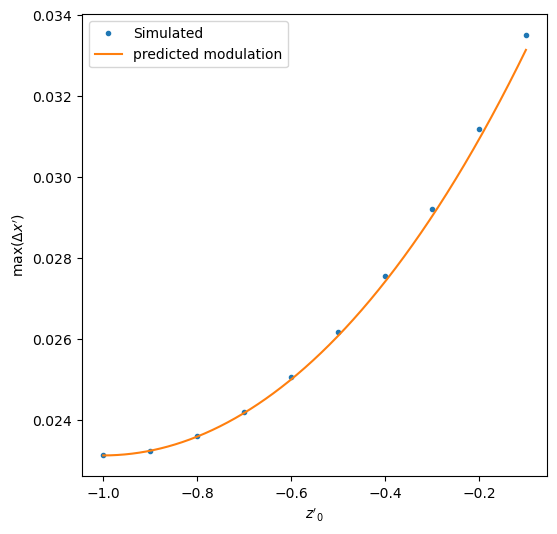

In [96]:
x_maxima = np.zeros(z0_range.size)
z_maxima = np.zeros(z0_range.size)
i=0
for z0 in z0_range:
    filename = f"z0/{format(z0, '.3f')}=z0.txt"
    time, x, z = np.loadtxt(filename, usecols=(0,1,2), skiprows=7, unpack=True)
    x_maxima[i] = np.max(x)
    z_maxima[i] = np.max(z)
    i+=1
#print(x_maxima)
#print(z_maxima)
plt.subplots(1, 1, figsize=(6, 6))
plt.plot(z0_range, x_maxima, linestyle=" ", marker=".", label="Simulated")
z_mod = np.linspace(z0_range.min(), z0_range.max(), 1000)
mod = modulation(z_mod, phi, x_maxima[0])
plt.plot(z_mod, mod, label="predicted modulation")
plt.xlabel(r"$z'_0$")
plt.ylabel(r"max($\Delta x'$)")
plt.legend(loc="best")

## Motion as a function of $\phi$

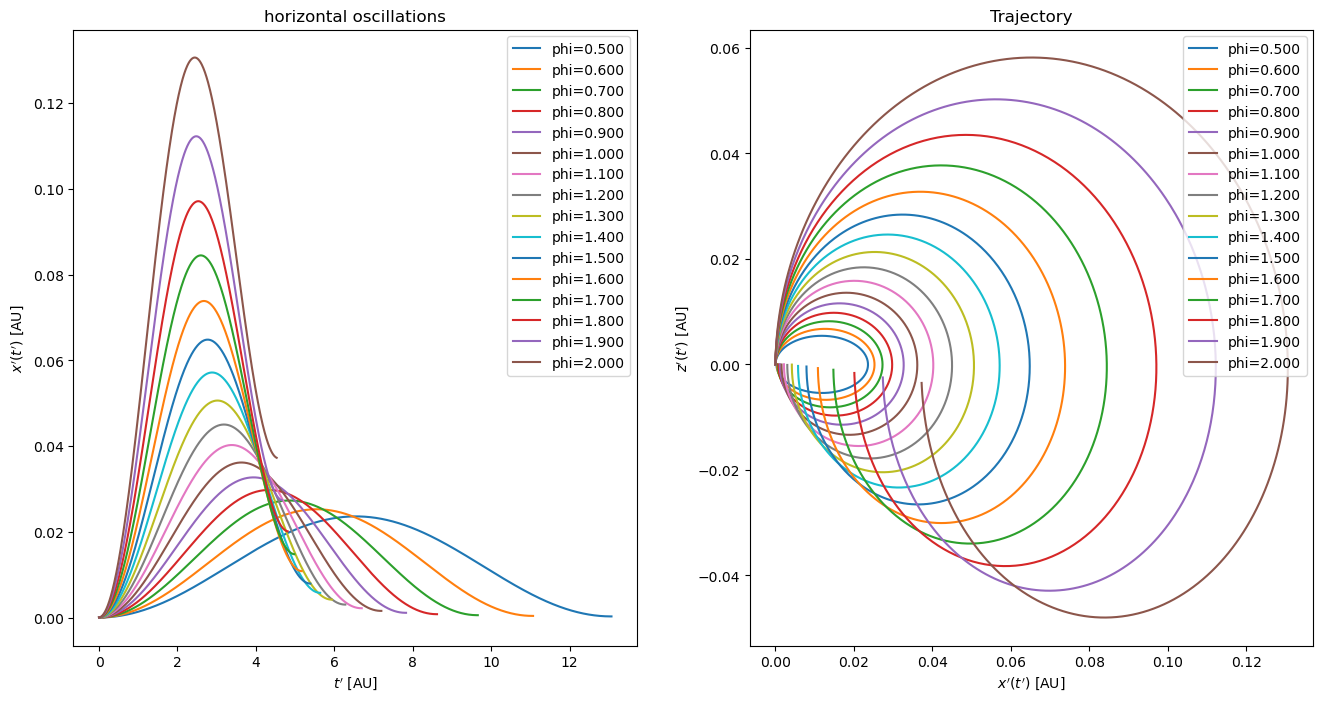

In [98]:
fig, axx = plt.subplots(1, 2, figsize=(16, 8))

phi_range = np.linspace(0.5, 2.0, 16)

ax1=axx[0]

for phi in phi_range:
    filename = f"phi/{format(phi, '.3f')}=phi.txt"
    time, x, z = np.loadtxt(filename, usecols=(0,1,2), skiprows=7, unpack=True)
    ax1.plot(time, x, linestyle="-", label=f"phi={format(phi, '.3f')}")
ax1.set_title("horizontal oscillations")
ax1.set_xlabel(r"$t'$ [AU]")
ax1.set_ylabel(r"$x'(t')$ [AU]")
ax1.legend(loc="best")

ax2=axx[1]

for phi in phi_range:
    filename = f"phi/{format(phi, '.3f')}=phi.txt"
    time, x, z = np.loadtxt(filename, usecols=(0,1,2), skiprows=7, unpack=True)
    ax2.plot(x, z, linestyle="-", label=f"phi={format(phi, '.3f')}")
#ax2.axhline(y=0.0, linestyle="--", color = "r")
ax2.set_title("Trajectory")
ax2.set_xlabel(r"$x'(t')$ [AU]")
ax2.set_ylabel(r"$z'(t')$ [AU]")
#ax2.set_xlim(-0.01, 0.1)
ax2.legend(loc="best")

Changing $\phi$ modifies not only the amplitude of the oscillation, but the period, too.

In [104]:
def period(phi):
    return 2*np.pi/np.sqrt(phi*np.tanh(phi))

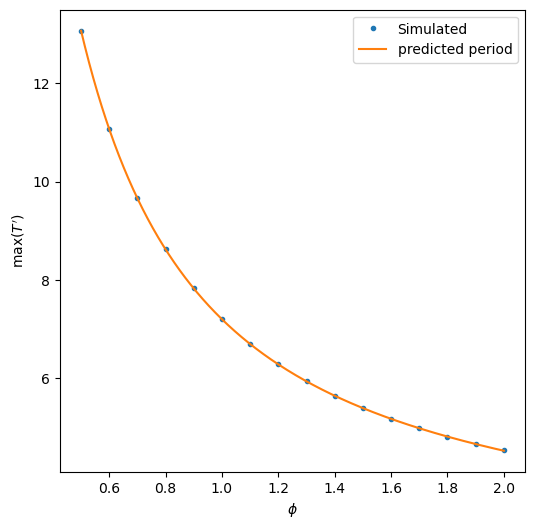

In [106]:
periods = np.zeros(phi_range.size)
i=0
for phi in phi_range:
    filename = f"phi/{format(phi, '.3f')}=phi.txt"
    time, x, z = np.loadtxt(filename, usecols=(0,1,2), skiprows=7, unpack=True)
    periods[i]=time[-1]
    i+=1
plt.subplots(1, 1, figsize=(6, 6))
plt.plot(phi_range, periods, linestyle=" ", marker=".", label="Simulated")
phi_per = np.linspace(phi_range.min(), phi_range.max(), 1000)
per = period(phi_per)
plt.plot(phi_per, per, label="predicted period")
plt.xlabel(r"$\phi$")
plt.ylabel(r"max($T'$)")
plt.legend(loc="best")

To be honest, this last graph doesn't make much sense. This is because the C++ code determines the max_time of numerical integration exactly by evaluating the formula we are comparing it with. I'll leave it here anyway.

## Wave profile
The wave profile (already rescaled) is:
$$ \zeta' = -(\alpha \sqrt{\phi\text{tanh}{\phi}})\text{sin}(\phi(x'-v'_{ph}t'))\text{cosh}(\phi) \text{.}$$
At a fixed time $t'$, this describes a sinusoidal shape. REMINDER: this is an approximate formula that neglects higher order terms.